## **Project Name**  
- Ted_talks_views_prediction(regression)


## **GitHub Link -**
https://github.com/ajaysable976/Ted_talks/blob/main/ted_talks_views_prediction(regression).ipynb

### Problem Statement

TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages.

Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.

The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.

## ***Let's Begin !***

### 1. Know Your Data

#### importing library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from wordcloud import WordCloud,ImageColorGenerator
pd.plotting.register_matplotlib_converters()
import calendar
     

In [3]:
import sklearn

from sklearn.model_selection import ShuffleSplit , StratifiedKFold , RepeatedStratifiedKFold ,train_test_split
from sklearn.model_selection import cross_val_score , cross_validate ,cross_val_predict

from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline


#### Dataset Loading

In [4]:
data = pd.read_csv('data_ted_talks.csv')

#### Dataset First View

In [5]:
data.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


#### Dataset Rows & Columns count

In [6]:
data.shape

(4005, 19)

#### Dataset Information

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [8]:
data.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

- There are missing value in the data

#### What did you know about your dataset?

The dataset contains features like:

1. talk_id: Talk identification number provided by TED
2. title: Title of the talk
3. speaker_1: First speaker in TED's speaker list
4. all_speakers: Speakers in the talk
5. occupations: Occupations of the speakers
6. about_speakers: Blurb about each speaker
7. recorded_date: Date the talk was recorded
8. published_date: Date the talk was published to TED.com
9. event: Event or medium in which the talk was given
10. native_lang: Language the talk was given in
11. available_lang: All available languages (lang_code) for a talk
12. comments: Count of comments
13. duration: Duration in seconds
14. topics: Related tags or topics for the talk
15. related_talks: Related talks (key='talk_id',value='title')
16. url: URL of the talk
17. description: Description of the talk
18. transcript: Full transcript of the talk

19. 'views': Count of views**(dependent varaible)**


## 2. Understanding Your Variables

In [9]:
# Dataset Columns
data.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [10]:
# Dataset Describe
data.describe(include='all')

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
count,4005.000000,4005,4005,4001,3483,3502,4.005000e+03,4004,4005,4005,4005,4005,3350.000000,4005.000000,4005,4005,4005,4005,4005
unique,NaN,4005,3274,3306,2049,2977,NaN,1334,2962,459,12,3902,NaN,NaN,3977,4005,4005,4005,4005
top,NaN,Averting the climate crisis,Alex Gendler,{0: 'Alex Gendler'},{0: ['writer']},{0: 'Alex Rosenthal takes everyday experiences...,NaN,2017-04-24,2017-09-07,TED-Ed,en,['en'],NaN,NaN,"['TED-Ed', 'math']","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
freq,NaN,1,34,34,53,10,NaN,97,27,556,3957,24,NaN,NaN,8,1,1,1,1
mean,12432.538327,NaN,NaN,NaN,NaN,NaN,2.148006e+06,NaN,NaN,NaN,NaN,NaN,161.997015,724.011236,NaN,NaN,NaN,NaN,NaN
std,17447.576262,NaN,NaN,NaN,NaN,NaN,3.451226e+06,NaN,NaN,NaN,NaN,NaN,268.838922,361.775462,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000,60.000000,NaN,NaN,NaN,NaN,NaN
25%,1252.000000,NaN,NaN,NaN,NaN,NaN,8.820690e+05,NaN,NaN,NaN,NaN,NaN,38.000000,393.000000,NaN,NaN,NaN,NaN,NaN
50%,2333.000000,NaN,NaN,NaN,NaN,NaN,1.375508e+06,NaN,NaN,NaN,NaN,NaN,89.000000,738.000000,NaN,NaN,NaN,NaN,NaN
75%,23777.000000,NaN,NaN,NaN,NaN,NaN,2.133110e+06,NaN,NaN,NaN,NaN,NaN,188.000000,974.000000,NaN,NaN,NaN,NaN,NaN


#### Check Unique Values for each variable.

In [11]:
# print the number of unique values for each column
print(data.nunique())

talk_id           4005
title             4005
speaker_1         3274
all_speakers      3306
occupations       2049
about_speakers    2977
views             3996
recorded_date     1334
published_date    2962
event              459
native_lang         12
available_lang    3902
comments           601
duration          1188
topics            3977
related_talks     4005
url               4005
description       4005
transcript        4005
dtype: int64


#### checking for Missing Value

In [12]:
# Missing Value Count Function
def show_missing():
    missing = data.columns[data.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(data[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(data[show_missing()].isnull().sum().sort_values(ascending = False)/len(data)*100,2))

Missing Data Count
comments          655
occupations       522
about_speakers    503
all_speakers        4
recorded_date       1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
comments          16.35
occupations       13.03
about_speakers    12.56
all_speakers       0.10
recorded_date      0.02
dtype: float64


In [13]:
data['occupations'].fillna(str({0:['other']}),inplace=True,axis=0)
data['about_speakers'].fillna(str({0:''}),inplace=True,axis=0)

In [14]:
data.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations         0
about_speakers      0
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

## 3. Data Wrangling

#### lets divide our dataset into different category like 
- numerical
- categorical
- target etc..

In [15]:
numerical_features   = ['duration',]
date_features    = ['recorded_date' , 'published_date']
categorical_features = ['event']

beta_features        = ['topics']
text_features = ['title' , 'about_speakers' , 'occupations' , 'transcript' , 'description' ,]

irrelevant_features  = ['url' , 'all_speakers' , 'speaker_1' , 'native_lang']
missing_features = ['available_lang' , 'comments' , 'related_talks']

target = ['views']

In [16]:
all_features = numerical_features + date_features + categorical_features + beta_features + text_features + irrelevant_features + missing_features + target


- Now lets keep only those column in the dataset we will help our model and **which is necessary to our dataset**
- we will exclude those columns which are **irrelevant**

In [17]:
df1 = data[target + numerical_features + date_features + categorical_features + beta_features + text_features]
df1.head()

,views,duration,recorded_date,published_date,event,topics,title,about_speakers,occupations,transcript,description
0,3523392,977,2006-02-25,2006-06-27,TED2006,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,{0: 'Nobel Laureate Al Gore focused the world’...,{0: ['climate advocate']},"Thank you so much, Chris. And it's truly a gre...",With the same humor and humanity he exuded in ...
1,14501685,1190,2006-02-22,2006-06-27,TED2006,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,"{0: 'In Hans Rosling’s hands, data sings. Glob...",{0: ['global health expert; data visionary']},"About 10 years ago, I took on the task to teac...",You've never seen data presented like this. Wi...
2,1920832,1286,2006-02-24,2006-06-27,TED2006,"['computers', 'entertainment', 'interface desi...",Simplicity sells,{0: 'David Pogue is the personal technology co...,{0: ['technology columnist']},"(Music: ""The Sound of Silence,"" Simon & Garfun...",New York Times columnist David Pogue takes aim...
3,2664069,1116,2006-02-26,2006-06-27,TED2006,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,{0: 'Majora Carter redefined the field of envi...,{0: ['activist for environmental justice']},If you're here today — and I'm very happy that...,"In an emotionally charged talk, MacArthur-winn..."
4,65051954,1164,2006-02-25,2006-06-27,TED2006,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,"{0: ""Creativity expert Sir Ken Robinson challe...","{0: ['author', 'educator']}",Good morning. How are you? (Audience) Good. It...,Sir Ken Robinson makes an entertaining and pro...


- looking at the above dataset we can see **recorded_date and published_date** lets add a new column usinf these two features

In [18]:
df1['recorded_date']  = pd.to_datetime(df1['recorded_date']  ,format='%Y-%m-%d')
df1['published_date'] = pd.to_datetime(df1['published_date'] ,format='%Y-%m-%d')

df1['days_taken_to_publish'] = df1['published_date'] - df1['recorded_date']

In [19]:
df1.head()

,views,duration,recorded_date,published_date,event,topics,title,about_speakers,occupations,transcript,description,days_taken_to_publish
0,3523392,977,2006-02-25,2006-06-27,TED2006,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,{0: 'Nobel Laureate Al Gore focused the world’...,{0: ['climate advocate']},"Thank you so much, Chris. And it's truly a gre...",With the same humor and humanity he exuded in ...,122 days
1,14501685,1190,2006-02-22,2006-06-27,TED2006,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,"{0: 'In Hans Rosling’s hands, data sings. Glob...",{0: ['global health expert; data visionary']},"About 10 years ago, I took on the task to teac...",You've never seen data presented like this. Wi...,125 days
2,1920832,1286,2006-02-24,2006-06-27,TED2006,"['computers', 'entertainment', 'interface desi...",Simplicity sells,{0: 'David Pogue is the personal technology co...,{0: ['technology columnist']},"(Music: ""The Sound of Silence,"" Simon & Garfun...",New York Times columnist David Pogue takes aim...,123 days
3,2664069,1116,2006-02-26,2006-06-27,TED2006,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,{0: 'Majora Carter redefined the field of envi...,{0: ['activist for environmental justice']},If you're here today — and I'm very happy that...,"In an emotionally charged talk, MacArthur-winn...",121 days
4,65051954,1164,2006-02-25,2006-06-27,TED2006,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,"{0: ""Creativity expert Sir Ken Robinson challe...","{0: ['author', 'educator']}",Good morning. How are you? (Audience) Good. It...,Sir Ken Robinson makes an entertaining and pro...,122 days


In [20]:
last_publishing_date = df1['published_date'].max()
last_publishing_date

Timestamp('2020-04-30 00:00:00')

- it looks like my **last Timestamp was 2020-04-30**
- lets use this feature and **create one more column**

In [21]:
df1['time_since_published'] = last_publishing_date - pd.DatetimeIndex(df1['published_date'])
df1.head()

,views,duration,recorded_date,published_date,event,topics,title,about_speakers,occupations,transcript,description,days_taken_to_publish,time_since_published
0,3523392,977,2006-02-25,2006-06-27,TED2006,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,{0: 'Nobel Laureate Al Gore focused the world’...,{0: ['climate advocate']},"Thank you so much, Chris. And it's truly a gre...",With the same humor and humanity he exuded in ...,122 days,5056 days
1,14501685,1190,2006-02-22,2006-06-27,TED2006,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,"{0: 'In Hans Rosling’s hands, data sings. Glob...",{0: ['global health expert; data visionary']},"About 10 years ago, I took on the task to teac...",You've never seen data presented like this. Wi...,125 days,5056 days
2,1920832,1286,2006-02-24,2006-06-27,TED2006,"['computers', 'entertainment', 'interface desi...",Simplicity sells,{0: 'David Pogue is the personal technology co...,{0: ['technology columnist']},"(Music: ""The Sound of Silence,"" Simon & Garfun...",New York Times columnist David Pogue takes aim...,123 days,5056 days
3,2664069,1116,2006-02-26,2006-06-27,TED2006,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,{0: 'Majora Carter redefined the field of envi...,{0: ['activist for environmental justice']},If you're here today — and I'm very happy that...,"In an emotionally charged talk, MacArthur-winn...",121 days,5056 days
4,65051954,1164,2006-02-25,2006-06-27,TED2006,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,"{0: ""Creativity expert Sir Ken Robinson challe...","{0: ['author', 'educator']}",Good morning. How are you? (Audience) Good. It...,Sir Ken Robinson makes an entertaining and pro...,122 days,5056 days


Looking at the above dataset we can see **published_date** has date,month and year combine data so lets create seperate columns for each like **year,month & day**

In [22]:
df1['month'] = pd.DatetimeIndex(df1['published_date']).month
df1['month'] = df1['month'].apply(lambda x: calendar.month_abbr[x])
df1['year'] = pd.DatetimeIndex(df1['published_date']).year
df1['day']  = pd.DatetimeIndex(df1['published_date']).day

In [23]:
df1.head()

,views,duration,recorded_date,published_date,event,topics,title,about_speakers,occupations,transcript,description,days_taken_to_publish,time_since_published,month,year,day
0,3523392,977,2006-02-25,2006-06-27,TED2006,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,{0: 'Nobel Laureate Al Gore focused the world’...,{0: ['climate advocate']},"Thank you so much, Chris. And it's truly a gre...",With the same humor and humanity he exuded in ...,122 days,5056 days,Jun,2006,27
1,14501685,1190,2006-02-22,2006-06-27,TED2006,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,"{0: 'In Hans Rosling’s hands, data sings. Glob...",{0: ['global health expert; data visionary']},"About 10 years ago, I took on the task to teac...",You've never seen data presented like this. Wi...,125 days,5056 days,Jun,2006,27
2,1920832,1286,2006-02-24,2006-06-27,TED2006,"['computers', 'entertainment', 'interface desi...",Simplicity sells,{0: 'David Pogue is the personal technology co...,{0: ['technology columnist']},"(Music: ""The Sound of Silence,"" Simon & Garfun...",New York Times columnist David Pogue takes aim...,123 days,5056 days,Jun,2006,27
3,2664069,1116,2006-02-26,2006-06-27,TED2006,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,{0: 'Majora Carter redefined the field of envi...,{0: ['activist for environmental justice']},If you're here today — and I'm very happy that...,"In an emotionally charged talk, MacArthur-winn...",121 days,5056 days,Jun,2006,27
4,65051954,1164,2006-02-25,2006-06-27,TED2006,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,"{0: ""Creativity expert Sir Ken Robinson challe...","{0: ['author', 'educator']}",Good morning. How are you? (Audience) Good. It...,Sir Ken Robinson makes an entertaining and pro...,122 days,5056 days,Jun,2006,27


- looking at the above dataset we can add some more feature using **views column**

- calculating the daily average views for each row of the dataset dataframe, based on the total number of views and the number of days since the content was published

In [24]:
df1['daily_views'] = df1['views'] / ( df1['time_since_published'].apply(lambda x : x.days) + 1 )

In [25]:
df1.head()

,views,duration,recorded_date,published_date,event,topics,title,about_speakers,occupations,transcript,description,days_taken_to_publish,time_since_published,month,year,day,daily_views
0,3523392,977,2006-02-25,2006-06-27,TED2006,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,{0: 'Nobel Laureate Al Gore focused the world’...,{0: ['climate advocate']},"Thank you so much, Chris. And it's truly a gre...",With the same humor and humanity he exuded in ...,122 days,5056 days,Jun,2006,27,696.735614
1,14501685,1190,2006-02-22,2006-06-27,TED2006,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,"{0: 'In Hans Rosling’s hands, data sings. Glob...",{0: ['global health expert; data visionary']},"About 10 years ago, I took on the task to teac...",You've never seen data presented like this. Wi...,125 days,5056 days,Jun,2006,27,2867.645837
2,1920832,1286,2006-02-24,2006-06-27,TED2006,"['computers', 'entertainment', 'interface desi...",Simplicity sells,{0: 'David Pogue is the personal technology co...,{0: ['technology columnist']},"(Music: ""The Sound of Silence,"" Simon & Garfun...",New York Times columnist David Pogue takes aim...,123 days,5056 days,Jun,2006,27,379.836267
3,2664069,1116,2006-02-26,2006-06-27,TED2006,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,{0: 'Majora Carter redefined the field of envi...,{0: ['activist for environmental justice']},If you're here today — and I'm very happy that...,"In an emotionally charged talk, MacArthur-winn...",121 days,5056 days,Jun,2006,27,526.808187
4,65051954,1164,2006-02-25,2006-06-27,TED2006,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,"{0: ""Creativity expert Sir Ken Robinson challe...","{0: ['author', 'educator']}",Good morning. How are you? (Audience) Good. It...,Sir Ken Robinson makes an entertaining and pro...,122 days,5056 days,Jun,2006,27,12863.744117


- looking at the above dataset we Add a new column using **event** column

In [26]:
# Add a new column called 'event_TED-Ed_BE' to the dataset
df1['event_TED-Ed_BE'] = df1['event'] == 'TED-Ed'


# Convert the values in 'event_TED-Ed_BE' to integers
df1['event_TED-Ed_BE'] = df1['event_TED-Ed_BE'].astype(int)

- Looking at the above data set we can see that the column **occupations** is not cleaned data it contains numbers,string and some punctuation Same is with the **about_speakers and topics** columns also so lets clean the column using **list comprehension**

In [156]:
df1['occupations'] = df1['occupations'].apply(lambda x : ' '.join([str(item) for sublist in list(x.values()) for item in sublist] ))

AttributeError: 'str' object has no attribute 'values'

- As you can see we are getting **AttributeError: 'str' object has no attribute 'values'** so to deal with this error we will use a method called **ast.literal_eval**


In [28]:
import ast

df1['occupations']    = df1['occupations']    .apply(ast.literal_eval)
df1['topics']         = df1['topics']         .apply(ast.literal_eval)
df1['about_speakers'] = df1['about_speakers'] .apply(ast.literal_eval)

In [29]:
df1['occupations'] = df1['occupations'].apply(lambda x : ' '.join([str(item) for sublist in list(x.values()) for item in sublist] ))

In [30]:
df1['about_speakers'] = df1['about_speakers'] .apply( lambda x : ' '.join([str(elem) for elem in x.values()]) )

In [31]:
df1.head()

,views,duration,recorded_date,published_date,event,topics,title,about_speakers,occupations,transcript,description,days_taken_to_publish,time_since_published,month,year,day,daily_views,event_TED-Ed_BE
0,3523392,977,2006-02-25,2006-06-27,TED2006,"[alternative energy, cars, climate change, cul...",Averting the climate crisis,Nobel Laureate Al Gore focused the world’s att...,climate advocate,"Thank you so much, Chris. And it's truly a gre...",With the same humor and humanity he exuded in ...,122 days,5056 days,Jun,2006,27,696.735614,0
1,14501685,1190,2006-02-22,2006-06-27,TED2006,"[Africa, Asia, Google, demo, economics, global...",The best stats you've ever seen,"In Hans Rosling’s hands, data sings. Global tr...",global health expert; data visionary,"About 10 years ago, I took on the task to teac...",You've never seen data presented like this. Wi...,125 days,5056 days,Jun,2006,27,2867.645837,0
2,1920832,1286,2006-02-24,2006-06-27,TED2006,"[computers, entertainment, interface design, m...",Simplicity sells,David Pogue is the personal technology columni...,technology columnist,"(Music: ""The Sound of Silence,"" Simon & Garfun...",New York Times columnist David Pogue takes aim...,123 days,5056 days,Jun,2006,27,379.836267,0
3,2664069,1116,2006-02-26,2006-06-27,TED2006,"[MacArthur grant, activism, business, cities, ...",Greening the ghetto,Majora Carter redefined the field of environme...,activist for environmental justice,If you're here today — and I'm very happy that...,"In an emotionally charged talk, MacArthur-winn...",121 days,5056 days,Jun,2006,27,526.808187,0
4,65051954,1164,2006-02-25,2006-06-27,TED2006,"[children, creativity, culture, dance, educati...",Do schools kill creativity?,Creativity expert Sir Ken Robinson challenges ...,author educator,Good morning. How are you? (Audience) Good. It...,Sir Ken Robinson makes an entertaining and pro...,122 days,5056 days,Jun,2006,27,12863.744117,0


In [32]:
# find categorical variables
categorical = [var for var in df1.columns if df1[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 8 categorical variables


In [33]:
# find Numerical variables
numerical = [var for var in df1.columns if df1[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 10 numerical variables


In [34]:
for element in numerical:
    print(type(element))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [35]:
discrete = []
for var in numerical:
    if len(df1[var].unique())<20:
        print(var, ' values: ', df1[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

year  values:  [2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2020]
event_TED-Ed_BE  values:  [0 1]
There are 2 discrete variables


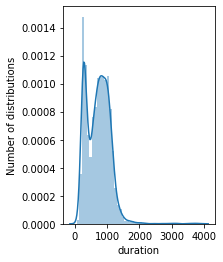

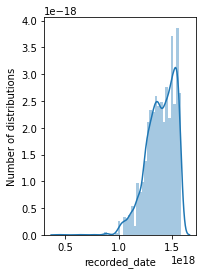

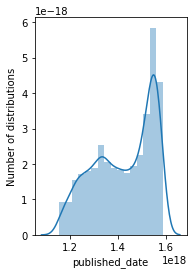

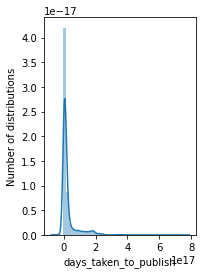

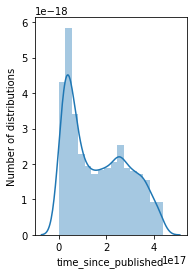

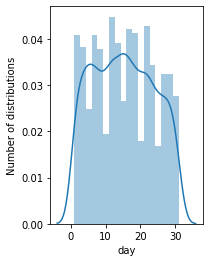

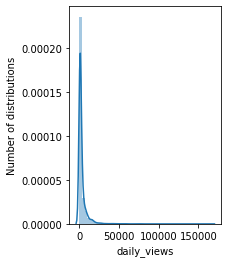

In [122]:
# Chart - 1 visualization code
continuous = [var for var in numerical if var not in discrete and var not in ['views']]
for var in continuous:
    plt.subplot(1, 2, 2)
    fig = sns.distplot((df1[var].dropna()))
    fig.set_ylabel('Number of distributions')
    fig.set_xlabel(var)

    plt.show()

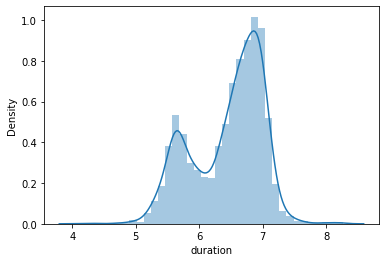

<Figure size 432x288 with 0 Axes>

In [118]:
# It looks more normal now.
sns.distplot((df1['duration']+1).transform(np.log),fit=None);
fig = plt.figure()

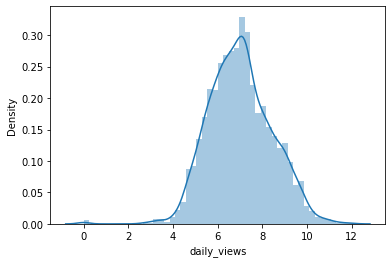

<Figure size 432x288 with 0 Axes>

In [123]:
# It looks more normal now.
sns.distplot((df1['daily_views']+1).transform(np.log),fit=None);
fig = plt.figure()

In [140]:
# It looks more normal now.
df1.dropna(how='all',inplace=True)

In [142]:
# It looks more normal now.
df1.isna().sum()

views                    0
duration                 0
recorded_date            1
published_date           0
event                    0
topics                   0
title                    0
about_speakers           0
occupations              0
transcript               0
description              0
days_taken_to_publish    1
time_since_published     0
month                    0
year                     0
day                      0
daily_views              0
event_TED-Ed_BE          0
topics_string            0
text_corpus              0
dtype: int64

In [150]:
df1['recorded_date'] = df1['recorded_date'].fillna(0)
df1.isna().sum()

views                    0
duration                 0
recorded_date            0
published_date           0
event                    0
topics                   0
title                    0
about_speakers           0
occupations              0
transcript               0
description              0
days_taken_to_publish    1
time_since_published     0
month                    0
year                     0
day                      0
daily_views              0
event_TED-Ed_BE          0
topics_string            0
text_corpus              0
dtype: int64

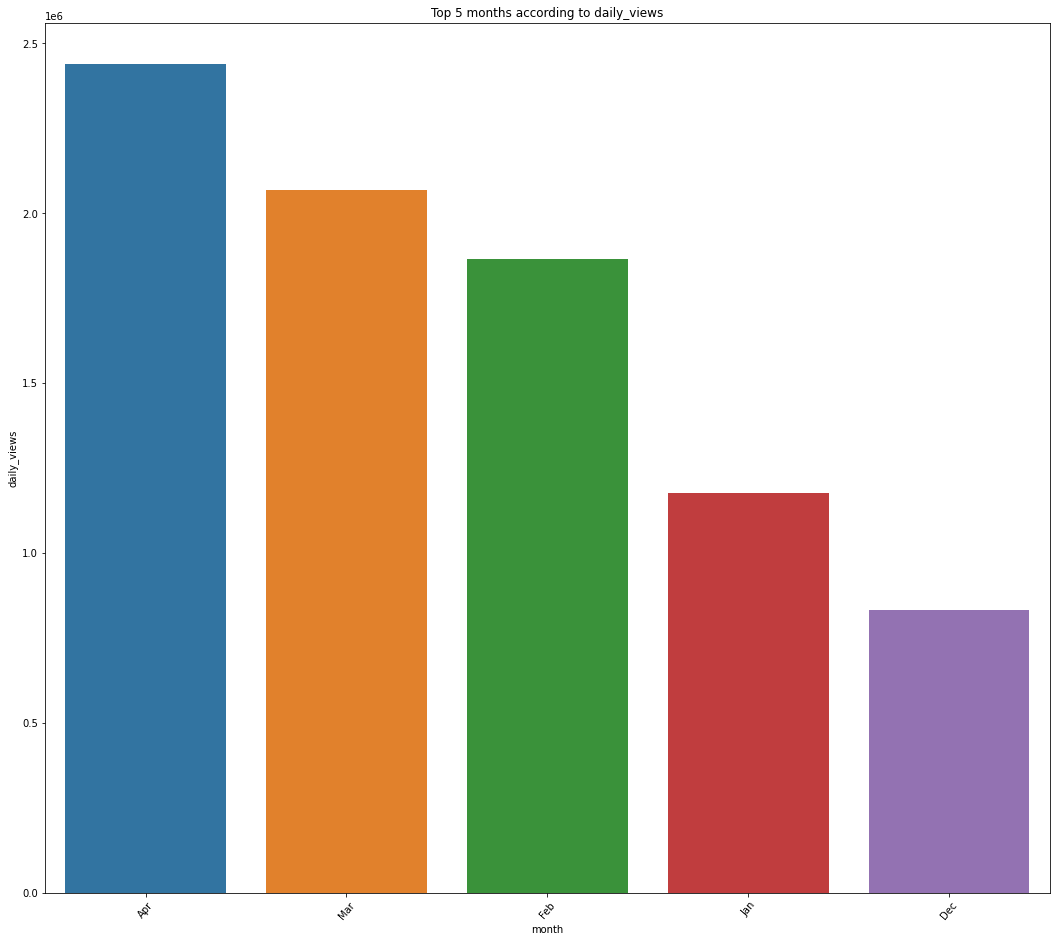

In [37]:
#top speakers
temp=df1.groupby(['month'],as_index=False)['daily_views'].sum().sort_values('daily_views',ascending=False)[:5]
plt.figure(figsize=(18,16))
ax=sns.barplot(x='month', y='daily_views',data=temp)
plt.setp(ax.get_xticklabels(), rotation=50);
plt.title('Top 5 months according to daily_views')
ax.grid(False)

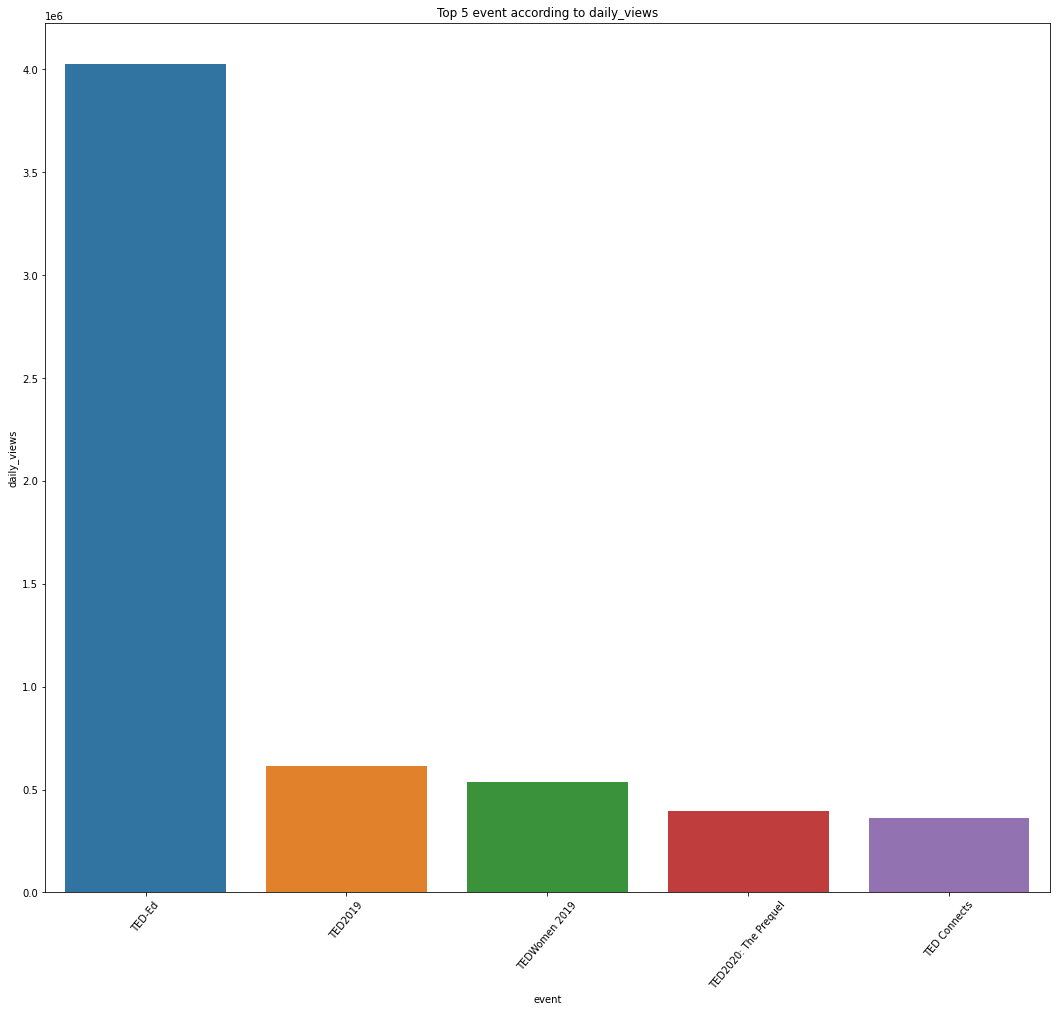

In [38]:
#top event
temp=df1.groupby(['event'],as_index=False)['daily_views'].sum().sort_values('daily_views',ascending=False)[:5]
plt.figure(figsize=(18,16))
ax=sns.barplot(x='event', y='daily_views',data=temp)
plt.setp(ax.get_xticklabels(), rotation=50);
plt.title('Top 5 event according to daily_views')
ax.grid(False)

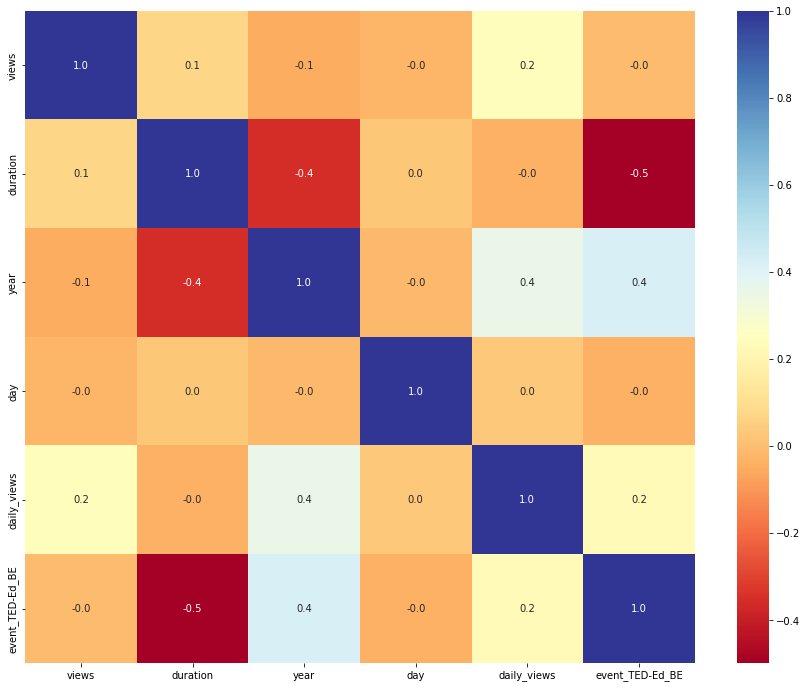

In [39]:
# Chart - 6 visualization code correlation
plt.figure(figsize = (15, 12))
sns.heatmap(df1.corr(), cmap="RdYlBu", annot=True, fmt=".1f")
plt.show()

- Now let's see who is the **most popular TED Talker**

In [40]:
speaker_df = data.groupby('speaker_1').count().reset_index()[['speaker_1', 'views']]
speaker_df.columns = ['main_speaker', 'appearances']
speaker_df = speaker_df.sort_values('appearances', ascending=False)
speaker_df.head(10)

,main_speaker,appearances
104,Alex Gendler,34
1318,Iseult Gillespie,19
998,Emma Bryce,12
715,Daniel Finkel,11
1231,Hans Rosling,10
108,Alex Rosenthal,10
1638,Juan Enriquez,9
1196,Greg Gage,9
581,Chris Anderson,8
2000,Marco Tempest,7


- Now let's see which is the **most popular occupation appearance**

In [41]:
occupation_df = data[data['occupations']!= 'unknown'].groupby('occupations').count().reset_index()[['occupations', 'views']]
occupation_df.columns = ['occupations', 'appearances']
occupation_df = occupation_df.sort_values('appearances', ascending=False)
occupation_df

,occupations,appearances
1388,{0: ['other']},522
2039,{0: ['writer']},53
1096,{0: ['journalist']},47
766,{0: ['entrepreneur']},42
156,{0: ['artist']},41
...,...,...
759,"{0: ['entrepreneur', 'programmer'], 1: ['head ...",1
758,"{0: ['entrepreneur', 'podcaster', 'storyteller']}",1
757,"{0: ['entrepreneur', 'philanthropist'], 1: ['h...",1
756,"{0: ['entrepreneur', 'marketer']}",1


<AxesSubplot:xlabel='occupations', ylabel='appearances'>

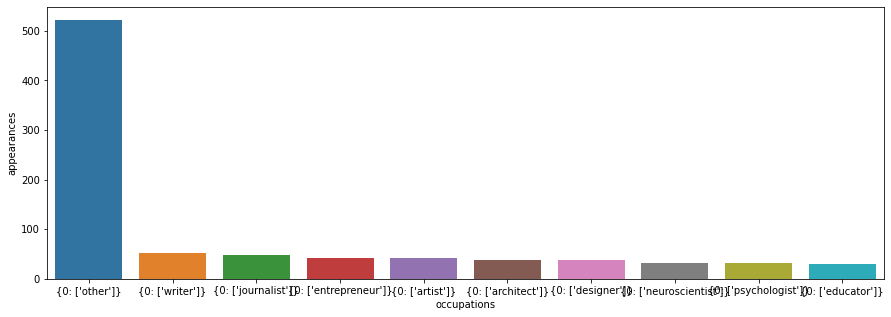

In [42]:
plt.figure(figsize=(15,5))
sns.barplot(x='occupations', y='appearances', data=occupation_df.head(10))

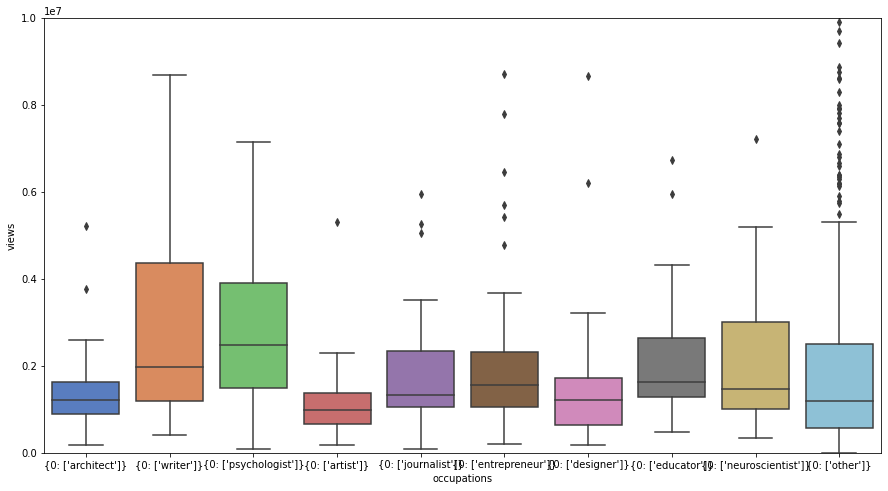

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='occupations', y='views', data=data[data['occupations'].isin(occupation_df.head(10)['occupations'])], palette="muted", ax =ax)
ax.set_ylim([0, 1e7])
plt.show()

In [44]:
df1.columns

Index(['views', 'duration', 'recorded_date', 'published_date', 'event',
       'topics', 'title', 'about_speakers', 'occupations', 'transcript',
       'description', 'days_taken_to_publish', 'time_since_published', 'month',
       'year', 'day', 'daily_views', 'event_TED-Ed_BE'],
      dtype='object')

In [45]:
df1['topics_string'] = df1['topics'].apply( lambda x : ' '.join([str(elem) for elem in x]) )
     

df1['text_corpus'] = \
  10*(' ' + df1['topics_string']) + 10*(' ' + df1['event']) \
+ 10*(' ' + df1['occupations']) + df1['transcript'] + ' ' \
+ df1['description'] + ' ' + df1['about_speakers'] + ' ' \
+ 3*(' ' + df1['title'])

df1['text_corpus']

0        alternative energy cars climate change cultur...
1        Africa Asia Google demo economics global issu...
2        computers entertainment interface design medi...
3        MacArthur grant activism business cities envi...
4        children creativity culture dance education p...
                              ...                        
4000     activism data technology mental health softwa...
4001     TED-Ed education history animation intelligen...
4002     society law policy justice system TEDx societ...
4003     TED-Ed education animation United States wome...
4004     animals TED-Ed animation oceans science educa...
Name: text_corpus, Length: 4005, dtype: object

In [46]:
df1.head()

,views,duration,recorded_date,published_date,event,topics,title,about_speakers,occupations,transcript,description,days_taken_to_publish,time_since_published,month,year,day,daily_views,event_TED-Ed_BE,topics_string,text_corpus
0,3523392,977,2006-02-25,2006-06-27,TED2006,"[alternative energy, cars, climate change, cul...",Averting the climate crisis,Nobel Laureate Al Gore focused the world’s att...,climate advocate,"Thank you so much, Chris. And it's truly a gre...",With the same humor and humanity he exuded in ...,122 days,5056 days,Jun,2006,27,696.735614,0,alternative energy cars climate change culture...,alternative energy cars climate change cultur...
1,14501685,1190,2006-02-22,2006-06-27,TED2006,"[Africa, Asia, Google, demo, economics, global...",The best stats you've ever seen,"In Hans Rosling’s hands, data sings. Global tr...",global health expert; data visionary,"About 10 years ago, I took on the task to teac...",You've never seen data presented like this. Wi...,125 days,5056 days,Jun,2006,27,2867.645837,0,Africa Asia Google demo economics global issue...,Africa Asia Google demo economics global issu...
2,1920832,1286,2006-02-24,2006-06-27,TED2006,"[computers, entertainment, interface design, m...",Simplicity sells,David Pogue is the personal technology columni...,technology columnist,"(Music: ""The Sound of Silence,"" Simon & Garfun...",New York Times columnist David Pogue takes aim...,123 days,5056 days,Jun,2006,27,379.836267,0,computers entertainment interface design media...,computers entertainment interface design medi...
3,2664069,1116,2006-02-26,2006-06-27,TED2006,"[MacArthur grant, activism, business, cities, ...",Greening the ghetto,Majora Carter redefined the field of environme...,activist for environmental justice,If you're here today — and I'm very happy that...,"In an emotionally charged talk, MacArthur-winn...",121 days,5056 days,Jun,2006,27,526.808187,0,MacArthur grant activism business cities envir...,MacArthur grant activism business cities envi...
4,65051954,1164,2006-02-25,2006-06-27,TED2006,"[children, creativity, culture, dance, educati...",Do schools kill creativity?,Creativity expert Sir Ken Robinson challenges ...,author educator,Good morning. How are you? (Audience) Good. It...,Sir Ken Robinson makes an entertaining and pro...,122 days,5056 days,Jun,2006,27,12863.744117,0,children creativity culture dance education pa...,children creativity culture dance education p...


### saving the new data

In [47]:
filepath = 'cleaned_data_all.csv'

df1.to_csv(filepath)

In [48]:
filepath = 'cleaned_data_NLP.csv'

dataset_nlp = df1[[
 'daily_views',
 'duration',
 'event_TED-Ed_BE',
 'days_taken_to_publish',
 'time_since_published',
 'text_corpus']]
 
dataset_nlp.to_csv(filepath)

In [49]:
dataset_nlp = pd.read_csv('cleaned_data_NLP.csv')
dataset_nlp.head()

,Unnamed: 0,daily_views,duration,event_TED-Ed_BE,days_taken_to_publish,time_since_published,text_corpus
0,0,696.735614,977,0,122 days,5056 days,alternative energy cars climate change cultur...
1,1,2867.645837,1190,0,125 days,5056 days,Africa Asia Google demo economics global issu...
2,2,379.836267,1286,0,123 days,5056 days,computers entertainment interface design medi...
3,3,526.808187,1116,0,121 days,5056 days,MacArthur grant activism business cities envi...
4,4,12863.744117,1164,0,122 days,5056 days,children creativity culture dance education p...


#### importing library

In [50]:
import re, string, unicodedata
import missingno as mno
import ast
import string
     

from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
#!pip install word2number
from word2number import w2n

In [52]:
#!pip install contractions
import contractions

In [53]:
import nltk
nltk.download("omw-1.4")

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vijay\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [54]:
nltk.download('stopwords')
nltk.download('wordnet')

#import inflect
from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

wordnet=WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vijay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vijay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [55]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

#### building text cleaning functions

In [56]:
def remove_punctuation(text):
  # creating an empty list
  expanded_words = []    
  for word in text.split():
    # using contractions.fix to expand the shotened words
    expanded_words.append(contractions.fix(word))   
      
  expanded_text = ' '.join(expanded_words)
  no_punct=expanded_text.translate(str.maketrans('', '', string.punctuation))

  return no_punct

In [57]:
dataset_nlp['text_corpus'] = dataset_nlp['text_corpus'].apply(remove_punctuation)
dataset_nlp.head(1).text_corpus

0    alternative energy cars climate change culture...
Name: text_corpus, dtype: object

In [58]:
def remove_punctuation_2(text):
  '''a function for removing punctuation'''
  text=re.sub("[^a-zA-Z]"," ",text)
  for word in text.split():
    try:
      w2n.word_to_num(word)
    except:
      continue
  # replacing the punctuations with no space, 
  # which in effect deletes the punctuation marks 
  translator = str.maketrans('', '', string.punctuation)
  # return the text stripped of punctuation marks
  return text.translate(translator)

In [59]:
dataset_nlp['text_corpus'] = dataset_nlp['text_corpus'].apply(remove_punctuation_2)
dataset_nlp.head(1).text_corpus

0    alternative energy cars climate change culture...
Name: text_corpus, dtype: object

In [60]:
def remove_stopwords(text):
  '''a function for removing the stopword'''
  # removing the stop words and lowercasing the selected words
  text = [wordnet.lemmatize(word.lower()) for word in text.split() if word.lower() not in sw]
  # joining the list of words with space separator
  return " ".join(text)

In [61]:
dataset_nlp['text_corpus'] = dataset_nlp['text_corpus'].apply(remove_stopwords)
dataset_nlp.head(1).text_corpus

0    alternative energy car climate change culture ...
Name: text_corpus, dtype: object

### Vectorization

In [62]:
# Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvect = TfidfVectorizer(stop_words='english' , lowercase=True , min_df = 10)

In [63]:
NLP_Vectors = tfidfvect.fit_transform(dataset_nlp['text_corpus']).toarray()
     

# collect the vocabulary items used in the vectorizer
dictionary = tfidfvect.vocabulary_.items()
dictionary

dict_items([('alternative', 427), ('energy', 4294), ('car', 1796), ('climate', 2202), ('change', 1971), ('culture', 3047), ('environment', 4385), ('global', 5516), ('issue', 6949), ('science', 11267), ('sustainability', 12610), ('technology', 12806), ('ted', 12808), ('advocate', 247), ('chris', 2094), ('truly', 13344), ('great', 5656), ('honor', 6102), ('opportunity', 8872), ('come', 2365), ('stage', 12167), ('twice', 13407), ('extremely', 4720), ('grateful', 5642), ('blown', 1372), ('away', 967), ('conference', 2546), ('want', 14015), ('thank', 12943), ('nice', 8559), ('comment', 2382), ('say', 11219), ('night', 8575), ('sincerely', 11717), ('partly', 9197), ('mock', 8187), ('need', 8487), ('laughter', 7281), ('position', 9711), ('flew', 5038), ('air', 329), ('force', 5130), ('year', 14359), ('shoe', 11602), ('boot', 1427), ('airplane', 337), ('applause', 628), ('tell', 12863), ('quick', 10228), ('story', 12317), ('illustrate', 6325), ('like', 7447), ('true', 13343), ('bit', 1295), ('

In [64]:
NLP_Vectors.shape

(4005, 14425)

In [65]:

len(tfidfvect.get_feature_names())

14425

In [66]:
NLP_Vectors_df = pd.DataFrame(NLP_Vectors , columns = tfidfvect.get_feature_names() , index = dataset_nlp.index )
     
NLP_Vectors_df 

,aaron,ab,aback,abandon,abandoned,abandoning,abc,abdomen,abdominal,abe,...,zinc,zip,zombie,zone,zoning,zoo,zoom,zooming,zuckerberg,zurich
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.032883,0.0,0.0,0.0,0.0,0.0,...,0.0,0.018965,0.0,0.0,0.044238,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4001,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4002,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4003,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [67]:
#dataset_nlp#.merge(NLP_Vectors_df)
ML_Features = pd.concat([dataset_nlp , NLP_Vectors_df ], axis=1)
ML_Features.head(1)

,Unnamed: 0,daily_views,duration,event_TED-Ed_BE,days_taken_to_publish,time_since_published,text_corpus,aaron,ab,aback,...,zinc,zip,zombie,zone,zoning,zoo,zoom,zooming,zuckerberg,zurich
0,0,696.735614,977,0,122 days,5056 days,alternative energy car climate change culture ...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
ML_Features = ML_Features.drop(['text_corpus'] , axis=1)

In [69]:
df=ML_Features.copy()
     

df.head(1)

,Unnamed: 0,daily_views,duration,event_TED-Ed_BE,days_taken_to_publish,time_since_published,aaron,ab,aback,abandon,...,zinc,zip,zombie,zone,zoning,zoo,zoom,zooming,zuckerberg,zurich
0,0,696.735614,977,0,122 days,5056 days,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Separating the dependent and independent variables

In [70]:
#separating the dependent and independent variables
y=df['daily_views']
X=df.drop(columns='daily_views')

### one hot encoding

In [71]:
#one hot encoding on categorical features
X=pd.get_dummies(X)
X.shape

(4005, 18315)

In [72]:

#checking for null values
X[['duration']].isna().sum()

duration    0
duration    0
dtype: int64

In [73]:

X.head()

,Unnamed: 0,duration,event_TED-Ed_BE,aaron,ab,aback,abandon,abandoned,abandoning,abc,...,time_since_published_987 days,time_since_published_988 days,time_since_published_989 days,time_since_published_99 days,time_since_published_990 days,time_since_published_993 days,time_since_published_994 days,time_since_published_995 days,time_since_published_996 days,time_since_published_997 days
0,0,977,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1190,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2,1286,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3,1116,0,0.0,0.0,0.0,0.0,0.032883,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,1164,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


### Model Building

In [74]:
import xgboost as xgb
xgb_model= xgb.XGBRegressor(objective="reg:squarederror")

In [78]:
X= ML_Features[['duration', 'year', 'day','event_TED-Ed_BE']]

In [79]:
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()
     

In [82]:
X_train, X_test, y_train, y_test= train_test_split(X, y,  test_size= 0.20, random_state= 5)
     

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [83]:
xgb_r2_train=xgb_model.score(X_train, y_train)
xgb_r2_train

0.9999979733167507

In [84]:
xgb_r2_test= xgb_model.score(X_test, y_test)
xgb_r2_test

0.9964676036795754

- the score is 0.99, which means that the model's predictions have an **MSE of 0.99**. This is a relatively small MSE, which suggests that the **model is making accurate predictions.**

In [85]:
xgb_y_train_pred= xgb_model.predict(X_train)
xgb_y_test_pred= xgb_model.predict(X_test)
     

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [86]:

mean_absolute_error(y_train,xgb_y_train_pred)

6.963720784862321

In [87]:
mean_absolute_error(y_test, xgb_y_test_pred)

48.863533037322064

- the mean absolute error on the training data is 6.96, which means that the model's predictions are, on average, off by about 6.96 on the training data. The mean absolute error on the test data is 48.8, which means that the model's predictions are, on average, off by about 48.8 on the test data


- A lower MAE value indicates a better fit and more accurate predictions. In this case, the MAE on the training data is much lower than the MAE on the test data, which suggests that the model is overfitting the training data and may not generalize well to new data. 

In [88]:
import math
     

xgb_rmse_train = math.sqrt(mean_squared_error(y_train,xgb_y_train_pred))
xgb_rmse_train

10.929729673404356

In [89]:
from catboost import CatBoostRegressor
     

model = CatBoostRegressor(iterations=50,
                          learning_rate=0.6,
                          depth=10)
model.fit(X_train, y_train)

0:	learn: 5321.0647956	total: 159ms	remaining: 7.78s
1:	learn: 3640.1750920	total: 176ms	remaining: 4.23s
2:	learn: 2864.0544809	total: 195ms	remaining: 3.05s
3:	learn: 2065.7006271	total: 215ms	remaining: 2.47s
4:	learn: 1659.8056580	total: 235ms	remaining: 2.11s
5:	learn: 1359.2139325	total: 254ms	remaining: 1.86s
6:	learn: 1201.0248553	total: 274ms	remaining: 1.68s
7:	learn: 1009.1114135	total: 294ms	remaining: 1.54s
8:	learn: 912.3432614	total: 316ms	remaining: 1.44s
9:	learn: 814.6974053	total: 336ms	remaining: 1.34s
10:	learn: 666.9888572	total: 358ms	remaining: 1.27s
11:	learn: 615.9643220	total: 384ms	remaining: 1.21s
12:	learn: 572.7886010	total: 407ms	remaining: 1.16s
13:	learn: 484.0987615	total: 429ms	remaining: 1.1s
14:	learn: 454.9352535	total: 456ms	remaining: 1.06s
15:	learn: 433.1870999	total: 480ms	remaining: 1.02s
16:	learn: 416.4206501	total: 503ms	remaining: 976ms
17:	learn: 360.0885353	total: 525ms	remaining: 934ms
18:	learn: 343.6092679	total: 547ms	remaining: 89

In [91]:
from sklearn.metrics import r2_score
cat_y_train_pred= model.predict(X_train)
cat_y_test_pred= model.predict(X_test)
     

cat_boost_r2_test = r2_score(y_test,cat_y_test_pred)
cat_boost_r2_test

0.9073034385420218

-  the **R-squared value is 0.907**, which means that the model explains about **90.7% of the variance in the data.**


- **Note:** that a high R-squared value does not necessarily mean that the model is the best possible model for the data. It is possible to have a high R-squared value even if the model is overfitting the data or if the predictors are not meaningful

In [92]:
cat_boost_r2_train=r2_score(y_train, cat_y_train_pred)
cat_boost_r2_train

0.9998423312615744

In [93]:
#fitting the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [94]:

#predicting the values for train and test set
y_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

MSE  = mean_squared_error(y_test, y_test_pred)
print("MSE on test is" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE on test is" ,RMSE)

y_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
print('Training MAE: {:0.2f}'.format(mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(mean_absolute_error(y_test, y_test_pred)))

MSE on test is 2.66955437218893e-23
RMSE on test is 5.166773047259702e-12
Training MAE: 0.00
Test MAE: 0.00


- the **MSE on the test set is 2.66955437218893e-23 and the RMSE on the test set is 5.166773047259702e-12**. These values are very small, which suggests that the model is **making very accurate predictions.**


- The **training MAE and test MAE are both 0.00, which means that the model's predictions are exactly correct on the training set and test set**. This is an exceptional performance and indicates that the model is likely to make accurate predictions on new data.

In [98]:
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics
#applying RandomForestRegressor on default parameters
rf = RandomForestRegressor(criterion='mae')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('Target mean: {:0.2f}'.format(y.mean()))
print('Target std: {:0.2f}'.format(y.std()))

Training MAE: 17.10
Test MAE: 18.72
Target mean: 3103.62
Target std: 7463.26


- the **training MAE is 17.10**, which means that the model's predictions are, on average, off by about 17.10. The **test MAE is 18.72**, which means that the model's predictions on the test set are, on average, off by about 18.72.


- The target mean and target standard deviation give you some context for interpreting the MAE values. The target mean is the average value of the target variable in the training set, and the target standard deviation is a measure of the spread of the target variable.


- If the MAE is small relative to the target mean and standard deviation, it means that the model's predictions are accurate. However, if the MAE is large relative to the target mean and standard deviation, it means that the model's predictions are not accurate and there is room for improvement.


- In this case, **the MAE values are relatively large compared to the target mean and standard deviation**. This suggests that the **model's predictions are not very accurate** and there may be room for improvement


### Removing overfitting

In [99]:
#Random Forest Regressor param_dict
n_estimators = [30,50,80,100,120,150]
max_depth = [4,6,8,10,12]
min_samples_split = [50,80,100,150,200]
min_samples_leaf = [10,30,40,50,60,80]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
#Random Forest Regressor param_dict
n_estimators = [30,50,80,100,120,150]
max_depth = [4,6,8,10,12]
min_samples_split = [50,80,100,150,200]
min_samples_leaf = [10,30,40,50,60,80]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [101]:
 from sklearn.model_selection import RandomizedSearchCV
# Create an instance of the random forest regressor
rf_model = RandomForestRegressor(criterion='mae')

#RandomSearch
rf_random = RandomizedSearchCV(rf_model,param_dict,verbose=0,cv=5)
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(criterion='mae'),
                   param_distributions={'max_depth': [4, 6, 8, 10, 12],
                                        'min_samples_leaf': [10, 30, 40, 50, 60,
                                                             80],
                                        'min_samples_split': [50, 80, 100, 150,
                                                              200],
                                        'n_estimators': [30, 50, 80, 100, 120,
                                                         150]})

In [102]:
#finding the optimal model w.r.t. best_estimator_
rf_optimal_model = rf_random.best_estimator_
     

rf_optimal_model

RandomForestRegressor(criterion='mae', max_depth=6, min_samples_leaf=10,
                      min_samples_split=50, n_estimators=150)

In [103]:
#calculating the MAE on train and test set
y_pred = rf_optimal_model.predict(X_train)
y_test_pred = rf_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 186.09
Test MAE: 106.18


In [104]:
# make predictions for test data
y_hat = rf_optimal_model.predict(X_test)
print(f'r_sqr value for train: {rf_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)
#Calculate Adjusted R-sqaured
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test set the R_Squared for RFforest is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

r_sqr value for train: 0.8226673370161794
For test set the R_Squared for RFforest is 0.969218967021621 and adjusted R_Squared is 0.9691804811089199


- the R-squared value for the training set is 0.8226673370161794, which means that the model explains about **82% of the variance in the training data**. This is generally considered a good fit, but there may still be room for improvement.


- The R-squared value for the test set is 0.969218967021621, which means that the model explains about **97% of the variance in the test data**. This is an excellent fit and indicates that the model is likely to generalize well to new data.


- The adjusted R-squared value is a modified version of R-squared that adjusts for the number of predictors in the model. In this case, the adjusted R-squared value for the **test set is 0.9691804811089199, which is very close to the R-squared value**. This suggests that the **model is not overfitting** and that the predictors are contributing significantly to the model's ability to explain the variance in the data.

### Conclusion


That's it we have reached the end of this project. We started the project with Data Exploration in which we faced many challenges as dataset included data in many different data structures which was bit complicated to extract but the most challenging part of EDA was dealing catagorical variables, it took lot of research to deal with such large number of catagorical variables. Following EDA we performed feature engineering, data cleaning, target encoding and one hot encoding of categorical columns, feature selection and then model building.